# 2018-02-20 Econ 101b Problem Set 7 with Draft Answers

## Problem set will be due Wed Mar 7 at midnight...

#### Sections between Tu AM & Th AM lecture will be problem set section...

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# ABOVE CELL IS "NO SCROLLING SUBWINDOWS" SETUP
#
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# THIS CELL LOADS THE LIBRARIES
#
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# PRETTIER GRAPHICS SETUP
#
# graphics setup: seaborn-whitegrid and figure size;
# graphs in the notebook itself...

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

In [6]:
# THIS CELL IS THE KEY TO THE OKPY.ORG AUTOGRADER SYSTEM
#
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.

!pip install -U okpy

from client.api.notebook import Notebook

ok = Notebook('ps7.ok')
_ = ok.auth(force=True, inline=True)

Requirement already up-to-date: okpy in /Users/delong/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: requests==2.12.4 in /Users/delong/anaconda3/lib/python3.6/site-packages (from okpy)
Requirement already up-to-date: coverage==3.7.1 in /Users/delong/anaconda3/lib/python3.6/site-packages (from okpy)
Assignment: PS7 Notebook
OK, version v1.13.10


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: 110G9RSchGy5oKKm2RkTMHYC2Tzt0k
Successfully logged in as jbdelong@berkeley.edu


### ⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎
### RUN THESE CELLS ABOVE FIRST

# Problem Set 7 (Due Mar 7 11:59:59 PM)

Due to the flu, we are going to be largely marking time with this problem set: we have not done much new, and so we are going to be filling in gaps and taking a slightly different look at things here...

----

&nbsp;

## Introduction

The autograder, both in the tests you run along the way as you work on the problem set and in calculating the final score, looks in the same directory as the problem set notebook for an "ok.tests" directory, and then runs the tests in the "q\*\*.py" files in that directory (where "\*\*" denotes a two-digit number, possibly with a leading zero). Those tests take the form of comparing a variable that should be in your namespace and seeing if it is close to some desired value that we get when we do the problem set.

Thus while the problem set instructions ask you to run simulations and plot graphs, what you are tested on is whether the appropriate variables in your namespace have (close to the) right values. We do not care what code you use in order to get those variables to the right values. 

You can run simulations and then pick appropriate values out by slicing a series in order to get the right number. 

You can use your knowledge of the algebraic solution to the model to have Python calculate the answer, having first set the parameters to the right values, as in:

    s = 0.24 # (say)
    n = 0.01
    g = 0.02
    delta = 0.03
    Delta_n = -0.01
    KoverYinitial = s/(n+g+delta)
    KoverYalternative = s/(n+Delta_n+g+delta)
    
You can even do all of the calculations on pen and paper, and simply code up:

    KoverYinitial = 4
    KoverYalternative = 4.8
    
Perhaps we should ask you to do all three—start with simulations, or with algebraic equations with set parameter values, or with full pen-and-paper calculations with only the final results entered into the notebook—and then ask you to check your results from one mode by doing the other two. But: _ars longa, vita brevis_. Focus on what works _for you_: the key is to get a sense of how economists' center-of-gravity analyses of long-run growth work, so that when you encounter such an analysis later, outside the university, you have the right intellectual panoply to evaluate it.

----

&nbsp;

## Programming Dos and Don'ts...

### A Running List...

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...   
&nbsp;

2. **Do** reload the page when restarting the kernel does not seem to do the job...   
&nbsp;

3. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...   
&nbsp;

4. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be. Only after you are **certain** that your namespace contains what you think it does should you write the next line of code. And then you should immediately test it...   
&nbsp;

5. **Do** take screenshots of your error messages...   
&nbsp;

6. **Do** google your error messages: Ms. Google is your best friend here...   
&nbsp;

7. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...   
&nbsp;

----

&nbsp;

**Thanks to**: Rachel Grossberg, Christopher Hench, Meghana Krishnakumer, Seth Lloyd, Ronald Walker...

**(Task A) Programming Practices**

If it strikes you that anything should be added to this list of programming dos and don'ts, please email it to me at <delong@econ.berkeley.edu>

----

**(Task B) Demographic Transtion**

How much of a difference successfully passing through the demographic transition makes for an economy depends critically on the value of the production function parameter $ \alpha $. A high value makes the demographic burdens of rapid population and labor force growth extremely expensive for an economy.

Recall our steady-state balanced growth path equations for the Solow growth model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{K}{Y}\right)^* =
\frac{s}{n+g+\delta} $

and:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right)^* =
{\left(\frac{K}{Y}\right)^*}
^\left(\frac{\alpha}{1-\alpha}\right)
E $

Assume s = 15%, g = 2% per year, $ \delta $ = 3% per year, the initial pre-transion $ n_{ini} $ = 3% per year, the alternative post-transition $ n_{alt} $ = 0% per year. Calculate the quotient of output per worker along the steady state balanced growth path for the alternative post-transition scenario divided by output per worker for the iniital pre-transition scenario for the following value of $ \alpha $:

* $ \alpha $ = 0.2
* $ \alpha $ = 0.4
* $ \alpha $ = 0.6
* $ \alpha $ = 0.8

Assign your calculated values to the appropriate variables in the Code Cell for Answers for Task (B) below

In [ ]:
# Code Cell for Answers for Task B

quotientalpha2 =
quotientalpha4 =
quotientalpha6 =
quotientalpha8 =

In [7]:
# DRAFT ANSWERS FOR TASK B

quotientalpha2 = 1.125
quotientalpha4 = 1.368
quotientalpha6 = 2.024
quotientalpha8 = 6.554

s=0.15
g=0.02
delta=0.03
n_ini=0.03
n_alt=0

KoY_ini = s/(n_ini+g+delta)
KoY_alt = s/(n_alt+g+delta)
KoY_ratio = KoY_alt/KoY_ini

alpha= 0.2
YoL_ratio = KoY_ratio**(alpha/(1-alpha))
print(YoL_ratio, "= ratio for α=0.2")

alpha= 0.4
YoL_ratio = KoY_ratio**(alpha/(1-alpha))
print(YoL_ratio, "= ratio for α=0.2")

alpha= 0.6
YoL_ratio = KoY_ratio**(alpha/(1-alpha))
print(YoL_ratio, "= ratio for α=0.2")

alpha= 0.8
YoL_ratio = KoY_ratio**(alpha/(1-alpha))
print(YoL_ratio, "= ratio for α=0.2")

1.1246826503806981 = ratio for α=0.2
1.3679807573413576 = ratio for α=0.2
2.023857702507762 = ratio for α=0.2
6.5536 = ratio for α=0.2


In [8]:
import numpy as np
ok.grade('q01')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 4}

----

&nbsp;

**(Task C) Cross-Country Productivity Differences I**

Consider a Solow growth model economy with a capital accumulation rate that depends on the relative price of capital goods $ p_k $, because a lower price of capital goods means that a similar amount of savings sY will translate into more investment in capital, thus:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d\left(ln(K)\right)}{dt} = 
\left(\frac{s}{p_k}\right)\left(\frac{Y}{K}\right) - \delta $

in which the relative price of capital goods is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ p_k = \left(\frac{Y}{L}\right)^{-\eta} $

with $ \eta $ being the Greek letter called "eta".

The steady-state balanced-growth path capital-output ratio would then be:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{K}{Y}\right)^* =
\frac{s/p_k}{n+g+\delta} $

and output per worker along the steady-state balanced-growth path would then be:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right)^* =
\left(\frac{s/p_k}{n+g+\delta}\right)
^{\frac{\alpha}{1-\alpha}}
E $

In this environment—in which high levels of the effiency of labor and output per worker carry with them a reduction in the relative price of capital goods—we seek to analyze what difference this dependence of the price of capita on prosperity makes. For this question, assume further that the economy's capital-output ratio and output per worker level is on its balanced growth path. And assume for this Task that the current level of the efficiency of labor E is equal to 1.

----

(1) Let the savings rate s=18%, the labor force growth rate n = 1% per year, the labor efficiency growth rate g = 2% per year, the depreciation rate $ \delta $ = 3% per year, and the production function parameter $ \alpha $ = 1/2.

(a) what is current balanced-growth path output per worker if $ \eta = 0 $? Set the variable YoLbg20 equal to your answer in the Code Cell for Answers for Task (C) below.

(b) what is current balanced-growth path output per worker if $ \eta = 0.1 $? Set the variable YoLbg21 equal to your answer in the Code Cell for Answers for Task (C) below.

(c) what is current balanced-growth path output per worker if $ \eta = 0.2 $? Set the variable YoLbg22 equal to your answer in the Code Cell for Answers for Task (C) below.

(d) what is current balanced-growth path output per worker if $ \eta = 0.3 $? Set the variable YoLbg23 equal to your answer in the Code Cell for Answers for Task (C) below.

(e) what is current balanced-growth path output per worker if $ \eta = 0.4 $? Set the variable YoLbg24 equal to your answer in the Code Cell for Answers for Task (C) below.

(f) what is current balanced-growth path output per worker if $ \eta = 0.5 $? Set the variable YoLbg25 equal to your answer in the Code Cell for Answers for Task (C) below.

----

(2) Let the savings rate s=18%, the labor force growth rate n = 1% per year, the labor efficiency growth rate g = 2% per year, the depreciation rate $ \delta $ = 3% per year, and the production function parameter $ \alpha $ = 3/4.

(a) what is current balanced-growth path output per worker if $ \eta = 0 $? Set the variable YoLbg30 equal to your answer in the Code Cell for Answers for Task (C) below.

(b) what is current balanced-growth path output per worker if $ \eta = 0.1 $? Set the variable YoLbg31 equal to your answer in the Code Cell for Answers for Task (C) below.

(c) what is current balanced-growth path output per worker if $ \eta = 0.2 $? Set the variable YoLbg32 equal to your answer in the Code Cell for Answers for Task (C) below.

----

(3) Is this method—take the Solow model balanced growth path and assume that the economy is going to be on it—a reasonable way to proceed in analyzing the question of how much difference an association of prosperity with low capital goods prices make? How might it lead to wrong conclusions? How would you test whether thoe conclusions are wrong? Write your answer in the Markdown Cell for Answers to Task C below.

In [ ]:
# Code Cell for Answers for Task C

YoLbg20 =   # (1)(a)
YoLbg21 =   # (1)(b)
YoLbg22 =   # (1)(c)
YoLbg23 =   # (1)(d)
YoLbg24 =   # (1)(e)
YoLbg25 =   # (1)(f)

YoLbg30 =   # (1)(a)
YoLbg31 =   # (1)(b)
YoLbg32 =   # (1)(c)

In [9]:
# DRAFT ANSWERS FOR TASK C

YoLbg20 = 3.000  # (1)(a)
YoLbg21 = 3.389  # (1)(b)
YoLbg22 = 3.948  # (1)(c)
YoLbg23 = 4.804  # (1)(d)
YoLbg24 = 6.240  # (1)(e)
YoLbg25 = 9.000  # (1)(f)

YoLbg30 = 27.00  # (1)(a)
YoLbg31 = 110.9  # (1)(b)
YoLbg32 = 3787  # (1)(c)

E = 1
s = 0.18
g = 0.02
n = 0.01
delta = 0.03
alpha = 0.75
eta = 0.3


YoLbg = ((s/(n+g+delta))**(alpha/(1-alpha-eta*alpha)) *
         E**((1-alpha)/(1-alpha-eta*alpha)))

YoLbg

205891132094643.38

### Markdown Cell for Answer to Task C(3)

&nbsp;

<font color="blue">ANSWER: </font>

In [10]:
import numpy as np
ok.grade('q02')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 8
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 8}

----

&nbsp;

**(Task D) Cross-Country Productivity Differences II**

Consider an economy with a capital accumulation rate that depends on the relative price of capital goods $ p_k $ thus:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d\left(ln(K)\right)}{dt} = 
\left(\frac{s}{p_k}\right)\left(\frac{Y}{K}\right) - \delta $

in which the relative price of capital goods is a function of the efficiency of labor:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ p_k = E^{-\eta} $

and which has an initial efficiency of labor $ E_0 $, an initial capital-output ratio $ K_0/Y_0 $, a constant efficiency of labor growth rate g, a constant population growth rate n, and a production function:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(\frac{K}{Y}\right)^{\frac{\alpha}{1-\alpha}}E $

The code cell below contains a small program to simulate this model for different parameter values and initial conditions. It is initially set up with:

* s = 0.18
* g = 0.02
* n = 0.01
* $ \delta = 0.03 $
* $ \eta = 0.0 $
* $ \alpha = 1/3 $
* $ L_0 = 1 $
* $ E_0 = 1 $
* $ \frac{K_0}{Y_0} = 3

Run the cell to check that it is working. Then alter the code to consider the cases:

* $ \eta = 0.0 $
* $ \eta = 0.2 $
* $ \eta = 0.4 $
* $ \eta = 0.6 $

Examine the results. Assign the appropriate values for output per worker and the capital-output ratio in the hundredth year of the simulation in the code cell "Code Cell fo rAnswers for Task D" further below. 

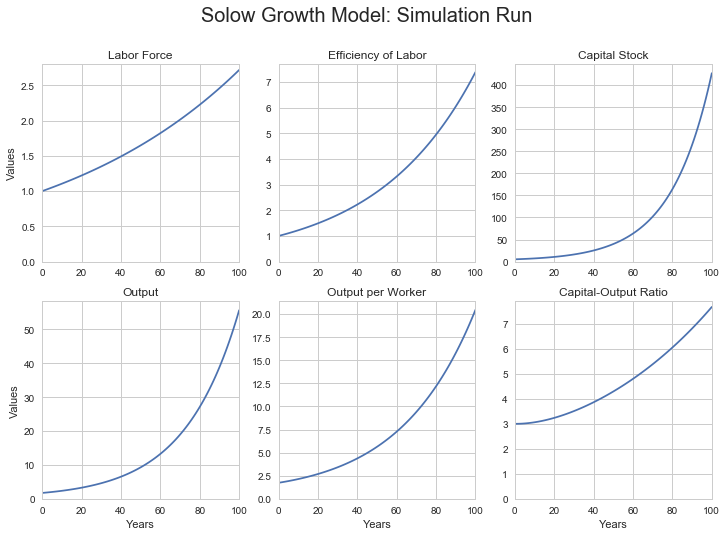

In [11]:
# Code cell for simulation for Task (D)

# check to see if libraries are in the current kernel
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

# simulation length
T = 100

# parameters
s = 0.18
g = 0.02
n = 0.01
delta = 0.03
eta = 0.6
alpha = 1/3

# initial conditions
L_0 = 1
E_0 = 1
KoY_0 = 3


sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
    'Efficiency',
    'Capital',
    'Output',
    'Output_per_Worker',
    'Capital_Output_Ratio',
    'Price_of_Capital'],
    dtype='float')

sg_df.Labor[0] = L_0
sg_df.Efficiency[0] = E_0
sg_df.Price_of_Capital[0] = sg_df.Efficiency[0]**(-eta)
sg_df.Capital_Output_Ratio[0] = KoY_0
sg_df.Output_per_Worker[0] = (sg_df.Capital_Output_Ratio[0]**(alpha/(1-alpha)) *
                             sg_df.Efficiency[0])
sg_df.Output[0] = sg_df.Output_per_Worker[0] * sg_df.Labor[0]
sg_df.Capital[0] = sg_df.Output[0] * sg_df.Capital_Output_Ratio[0]

for i in range(T):
    sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n))
    sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g))
    sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp(s
        *sg_df.Output[i]/(sg_df.Capital[i]*sg_df.Price_of_Capital[i]) - 
        delta))
    sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
        (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
    sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
    sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
        sg_df.Output[i+1])
    sg_df.Price_of_Capital[i+1] = sg_df.Efficiency[i+1]**(-eta)

fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2,3,1)
sg_df.Labor.plot(ax = ax1, title = "Labor Force")
plt.ylabel("Values")
plt.ylim(0, )

ax2 = plt.subplot(2,3,2)
sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
plt.ylim(0, )
    
ax3 = plt.subplot(2,3,3)
sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
plt.ylim(0, )

ax4 = plt.subplot(2,3,4)
sg_df.Output.plot(ax = ax4, title = "Output")
plt.ylim(0, )
plt.xlabel("Years")
plt.ylabel("Values")

ax5 = plt.subplot(2,3,5)
sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
plt.xlabel("Years")
plt.ylim(0, )

ax6 = plt.subplot(2,3,6)
sg_df.Capital_Output_Ratio.plot(ax = ax6, 
    title = "Capital-Output Ratio")
plt.xlabel("Years")
plt.ylim(0, )

plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

plt.show()

In [ ]:
# Code Cell for Answers for Task D

YoL100eta0 = 
YoL100eta2 =
YoL100eta4 =
YoL100eta6 =

KoY100eta0 =
KoY100eta2 =
KoY100eta4 =
KoY100eta6 =

In [12]:
# DRAFT ANSWERS for Task D

YoL100eta0 = 12.798
YoL100eta2 = 14.912
YoL100eta4 = 17.442
YoL100eta6 = 20.468

KoY100eta0 = 3.000
KoY100eta2 = 4.073
KoY100eta4 = 5.572
KoY100eta6 = 7.673

In [13]:
import numpy as np
ok.grade('q03')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 8
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 8}

----

&nbsp;

**(Task E) Cross-Country Productivity Differences III**

As we said in lecture, it is a scandal that the world today is so unequal—so much more unequal than it was two centuries ago—and that 1.5 billion out of our 7 billion or so fellow human beings still live lives not all that distinguishable from those of our pre-Industrial Revolution ancestors, and only 1 billion or so participate fully in the wealth of today's Global North.

The bare Solow growth model does not do a good job of accounting for this "Divergence, Big Time". With the standard estimate of the production function parameter $ \alpha = 1/3 $ and with the presumption that the efficiency of labor E is principally determined by ideas about technology and organization that can be easily communicated and learned, the underlying bias of the Solow growth model is toward one of anticipating relatively rapid economic convergence to Global North productivity levels. That has not happened.

This problem set has indicated two modifications to the Solow model that have some promise for explaining some of the "Divergence, Big Time" that characterizes our world: the demographic burdens placed on emerging markets that are still undergoing pre-Demographic Transition rapid population growth, and the association of a high efficiency of labor with a relative price structure that makes boosting productivity through investment easy.

In the appropriate space in "Markdown Cell for Answer to Task E" below, write an essay of about 250 words indicating what you think would be possibly fruitful directions to further extend and modify the Solow growth model so that it can teach us more about why today's economic world is such an unequal place.

----

&nbsp;

### Markdown Cell for Answer to Task E

&nbsp;

<font color="blue">ANSWER: </font>

In [16]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 100% complete
Backup... 100% complete
Submission successful for user: jbdelong@berkeley.edu
URL: https://okpy.org/cal/econ101b/sp18/PS7/submissions/Wnlzpn

